In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys

w0 = 0.5
w1 = 20
sig2 = 0.1

def w0h (X):
    N = len(X)
    s1 = np.sum(X[:,0])
    s2 = np.sum(X[:,0] ** 2)
    sxn = np.sum(X[:,1])
    sxnzn = np.sum(X[:,0] * X[:,1])
    co = 1.0 / (N * s2 - s1 * s1)
    return co * (s2 * sxn - s1 * sxnzn)

def w1h (X):
    N = len(X)
    s1 = np.sum(X[:,0])
    s2 = np.sum(X[:,0] ** 2)
    sxn = np.sum(X[:,1])
    sxnzn = np.sum(X[:,0] * X[:,1])
    co = 1.0 / (N * s2 - s1 * s1)
    return co * (-s1 * sxn + N * sxnzn)


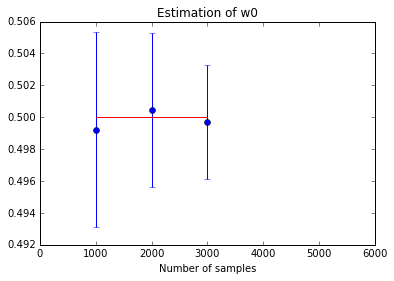

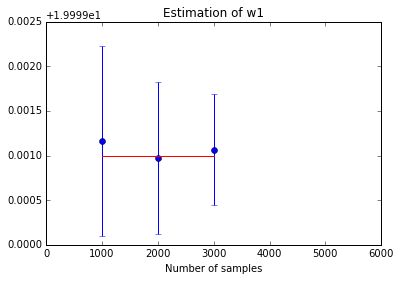

In [23]:

def genData(N, MV = 10):
    z = np.linspace(0, MV, N)
    e = np.random.normal(0, sig2, size=N)
    x = w1 * z + e
    x = x + w0
    X = np.array([z, x]).transpose()
    return X


iter = 100
samples = np.array([1000, 2000, 3000])
# samples = np.arange(0, 300, 10)

s = len(samples)
ew0 = np.ndarray(shape=(s, iter), dtype=float)
ew1 = np.ndarray(shape=(s, iter), dtype=float)
wmean = np.ndarray(shape=(s, 2), dtype=float)
wstd  = np.ndarray(shape=(s, 2), dtype=float)
rw0 = np.full((s, 1), w0, dtype=float)
rw1 = np.full((s, 1), w1, dtype=float)


i = 0
for n in samples:
    for j in range(0, iter):
        data = genData(n)
        ew0[i][j] = w0h(data)
        ew1[i][j] = w1h(data)
        
    wmean[i][0] = np.mean(ew0[i])
    wstd[i][0] = np.std(ew0[i])
    wmean[i][1] = np.mean(ew1[i])
    wstd[i][1] = np.std(ew1[i])
    i = i + 1
    

plt.errorbar(samples, wmean[:,0], wstd[:,0], linestyle='None', marker='o')
plt.plot(samples, rw0, 'r')
plt.xlabel("Number of samples")
plt.title("Estimation of w0")
plt.xlim((samples[0] - samples[0], samples[-1] + samples[-1]))
# plt.ylim((0.4, 0.6))

plt.show()

plt.errorbar(samples, wmean[:,1], wstd[:,1], linestyle='None', marker='o')
plt.plot(samples, rw1, 'r')
plt.title("Estimation of w1")
plt.xlabel("Number of samples")
plt.xlim((samples[0] - samples[0], samples[-1] + samples[-1]))
# plt.ylim((18, 22))

plt.show()
        

